T4以上のGPU必須

# リポジトリクローン（デモ用画像のため）

In [1]:
!git clone https://github.com/MoonshotAI/Kimi-VL
%cd Kimi-VL

Cloning into 'Kimi-VL'...
remote: Enumerating objects: 81, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 81 (delta 20), reused 5 (delta 5), pack-reused 57 (from 1)
Receiving objects: 100% (81/81), 13.28 MiB | 17.23 MiB/s, done.
Resolving deltas: 100% (39/39), done.
/content/Kimi-VL


# モデル読み込み

In [2]:
model_path = "moonshotai/Kimi-VL-A3B-Instruct"
# model_path = "moonshotai/Kimi-VL-A3B-Thinking"

In [3]:
from transformers import AutoModelForCausalLM, AutoProcessor

model = AutoModelForCausalLM.from_pretrained(
    model_path,
    torch_dtype="auto",
    device_map="auto",
    trust_remote_code=True,
)
processor = AutoProcessor.from_pretrained(model_path, trust_remote_code=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/2.00k [00:00<?, ?B/s]

configuration_kimi_vl.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/moonshotai/Kimi-VL-A3B-Instruct:
- configuration_kimi_vl.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_kimi_vl.py:   0%|          | 0.00/106k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/moonshotai/Kimi-VL-A3B-Instruct:
- modeling_kimi_vl.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/588k [00:00<?, ?B/s]

Fetching 7 files:   0%|          | 0/7 [00:00<?, ?it/s]

model-00003-of-00007.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00005-of-00007.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00002-of-00007.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00006-of-00007.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00004-of-00007.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00001-of-00007.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00007-of-00007.safetensors:   0%|          | 0.00/2.84G [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/accelerate/utils/modeling.py:1569: UserWarning: Current model requires 369099456 bytes of buffer for offloaded layers, which seems does not fit any GPU's remaining memory. If you are experiencing a OOM later, please consider using offload_buffers=True.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/149 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/401 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.86k [00:00<?, ?B/s]

processing_kimi_vl.py:   0%|          | 0.00/7.71k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/moonshotai/Kimi-VL-A3B-Instruct:
- processing_kimi_vl.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


image_processing_kimi_vl.py:   0%|          | 0.00/4.68k [00:00<?, ?B/s]

tokenization_moonshot.py:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

tiktoken.model:   0%|          | 0.00/2.80M [00:00<?, ?B/s]

chat_template.jinja:   0%|          | 0.00/1.03k [00:00<?, ?B/s]

# 推論

In [4]:
from PIL import Image

image_path = "./figures/demo.png"
image = Image.open(image_path)

# プロンプト生成
messages = [
    {"role": "user", "content":
        [
            {"type": "image", "image": image_path},
            {"type": "text", "text": "What is the dome building in the picture? Think step by step."}
        ]
    }
]
text = processor.apply_chat_template(messages, add_generation_prompt=True, return_tensors="pt")
inputs = processor(images=image, text=text, return_tensors="pt", padding=True, truncation=True).to(model.device)

In [5]:
%%time
# 推論
generated_ids = model.generate(**inputs, max_new_tokens=512)

CPU times: user 4min 10s, sys: 2.67 s, total: 4min 13s
Wall time: 4min 40s


In [6]:
# 後処理
generated_ids_trimmed = [
    out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
]
response = processor.batch_decode(
    generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
)[0]

# 結果確認

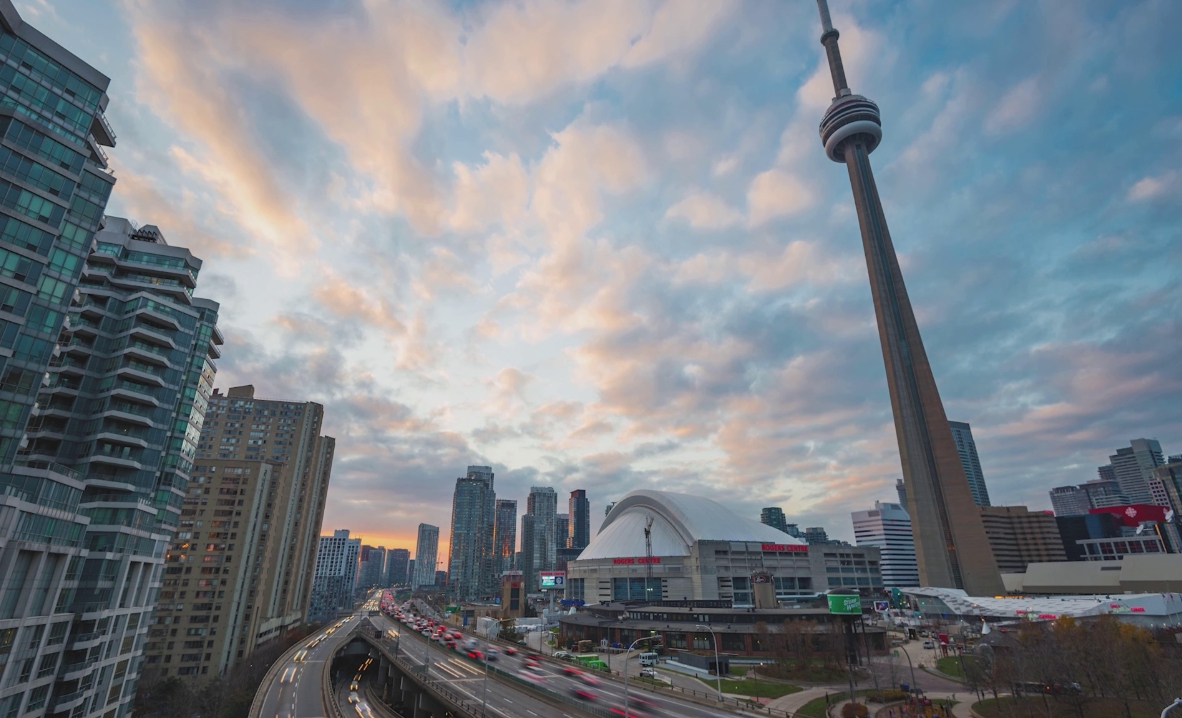

In [7]:
image

In [8]:
print(response)

To identify the dome building in the picture, we can follow these steps:

1. **Observation**: Look at the image and identify the prominent structures. In this case, there is a large dome-shaped building in the center of the image.

2. **Contextual Clues**: Note any distinctive features or signs that might help in identifying the building. In the image, there is a sign on the building that reads "Rogers Centre."

3. **Recognition**: Combine the visual observation with the contextual clues to make an educated guess. The dome shape and the name "Rogers Centre" are characteristic features of the Rogers Centre, a well-known sports and entertainment venue in Toronto, Canada.

4. **Conclusion**: Based on the visual and contextual information, the dome building in the picture is the Rogers Centre.

Therefore, the dome building in the picture is the Rogers Centre.
